In [1]:
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the images to be 1D arrays
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 784)
x_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Instantiate a Sequential model
model = Sequential()

# Add the input layer
model.add(Dense(units=128, activation='relu', input_shape=(784,)))

# Add one or more hidden layers
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))


# Add the output layer
model.add(Dense(units=10, activation='softmax'))

# Print a summary of the model
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8582 - loss: 0.4802 - val_accuracy: 0.9656 - val_loss: 0.1142
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9685 - loss: 0.1079 - val_accuracy: 0.9710 - val_loss: 0.0946
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9771 - loss: 0.0737 - val_accuracy: 0.9716 - val_loss: 0.0925
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9828 - loss: 0.0562 - val_accuracy: 0.9715 - val_loss: 0.0933
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9869 - loss: 0.0409 - val_accuracy: 0.9748 - val_loss: 0.0859
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9884 - loss: 0.0338 - val_accuracy: 0.9768 - val_loss: 0.0857
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9903 - loss: 0.0288 - val_accuracy: 0.9754 - val_loss: 0.0885
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9913 - loss: 0.0252 

In [7]:
df_orders = pd.read_csv('/content/mnist_train.csv')

# Display the first few rows and info of the dataframe
display(df_orders.head())
df_orders.info()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Columns: 785 entries, label to 28x28
dtypes: float64(465), int64(320)
memory usage: 6.9 MB


Correctly Predicted Examples:


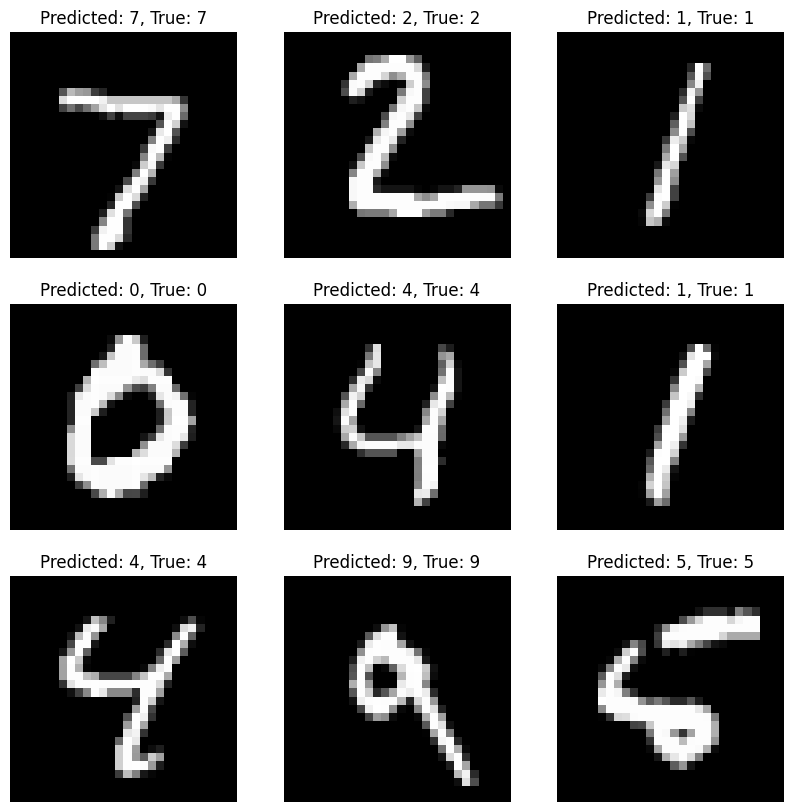


Incorrectly Predicted Examples:


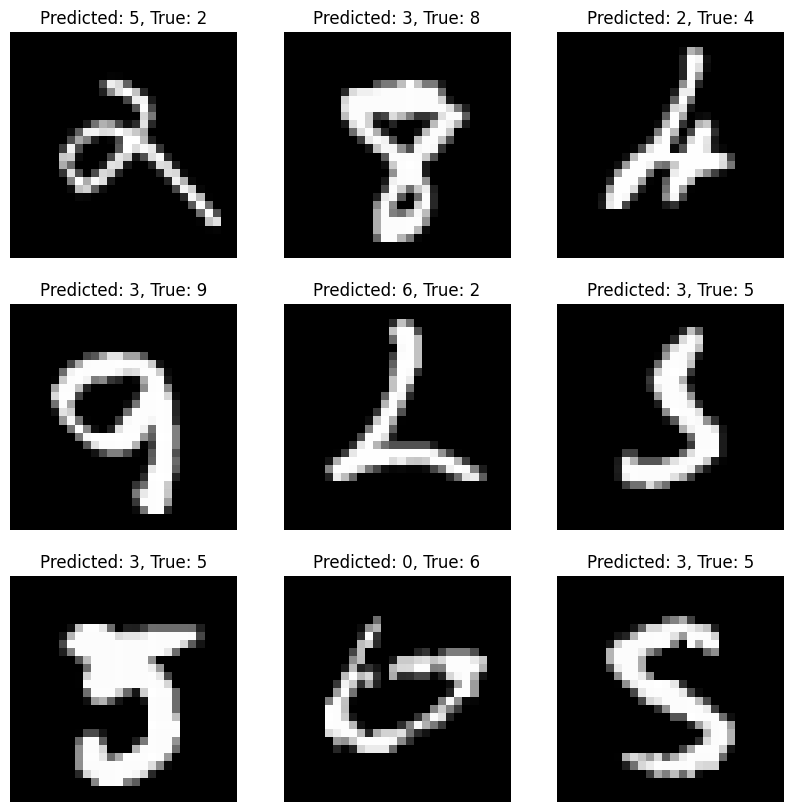

In [11]:

correct_indices = np.where(y_pred == y_test)[0]
incorrect_indices = np.where(y_pred != y_test)[0]

# Display some correct predictions
print("Correctly Predicted Examples:")
plt.figure(figsize=(10, 10))
for i, correct_index in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[correct_index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {y_pred[correct_index]}, True: {y_test[correct_index]}")
    plt.axis('off')
plt.show()

# Display some incorrect predictions
print("\nIncorrectly Predicted Examples:")
plt.figure(figsize=(10, 10))
for i, incorrect_index in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[incorrect_index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {y_pred[incorrect_index]}, True: {y_test[incorrect_index]}")
    plt.axis('off')
plt.show()

Test loss: 0.1048
Test accuracy: 0.9745
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.95      0.98      0.96      1010
           4       0.96      0.98      0.97       982
           5       0.99      0.94      0.97       892
           6       0.97      0.99      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



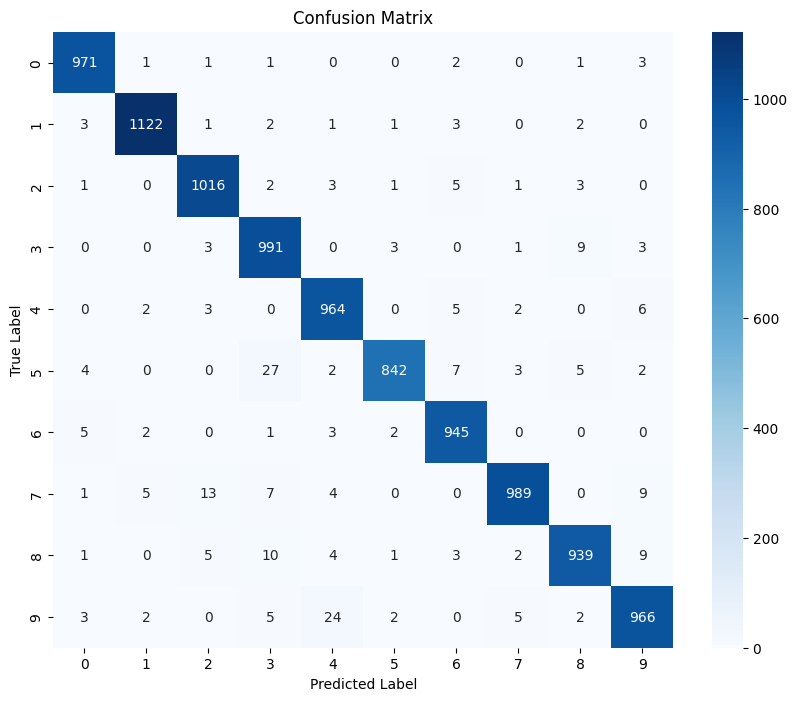

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


y_pred = np.argmax(model.predict(x_test), axis=-1)

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

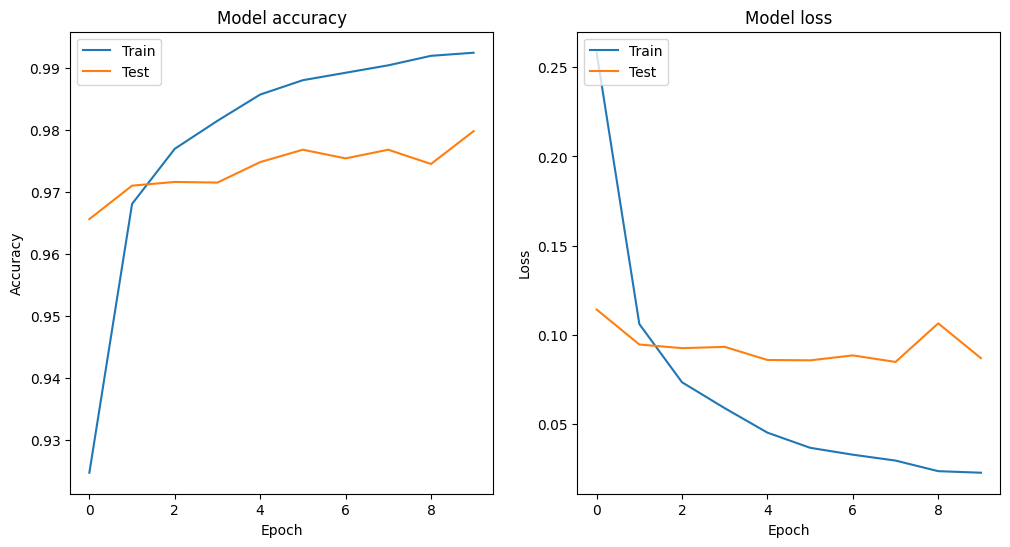

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()